<a href="https://colab.research.google.com/github/u5633772/u5633772-DataScience-GenAI-Submissions/blob/main/MLM_loan_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


# Task
Separate the features and target variables from the `df` DataFrame, where features (`X`) include all columns except 'loan_status' and the target (`y`) is the 'loan_status' column, then display the shapes of `X` and `y`.

## Separate Features and Target

### Subtask:
Create two new DataFrames: `X` containing all columns from `df` except 'loan_status' (your features), and `y` containing only the 'loan_status' column (your target variable).


**Reasoning**:
Separate the features (X) and the target variable (y) from the 'df' DataFrame according to the instructions, and then display their shapes to verify the operation.



In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (50000, 15)
Shape of y: (50000,)


AI Prompt: y-label is loan status and the rest are x-features, separate both

The features DataFrame (X), containing all columns except 'loan_status', has a shape of (50000, 15), indicating 50,000 samples and 15 feature columns.

The target (y)-labels, representing the 'loan_status' column, has a shape of (50000,), indicating 50,000 target values corresponding to the number of samples.

This shows X-features and Y-labels have been separated.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40000, 15)
Shape of X_test: (10000, 15)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


## Final Task

**AI Prompt:** `split data in train and test (80% train) and print the test and train shapes to confirm split is sucessful. final task: in a text cell write down this AI prompt and comment whether split has taken place as predicted.`

**Comment:** The data has been successfully split into training (80%) and testing (20%) sets as predicted. The shapes printed above confirm the correct division of samples for both features (`X`) and the target variable (`y`).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the *same* fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier viewing and maintaining column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("First 5 rows of X_train_scaled:")
display(X_train_scaled.head())

First 5 rows of X_train_scaled:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,-1.163997,-0.676089,-0.990526,-1.369669,-1.091208,-0.276376,-0.989770,-0.239095,0.528462,2.064326,-1.215234,1.702732,-1.361311,-1.339839,-1.341915
1,-0.445439,-0.833159,-0.873459,-0.225975,-0.135110,-0.036720,-0.505841,-0.239095,-0.655899,-0.357810,-1.219067,-0.275252,0.411548,-1.380587,-1.380517
2,-0.535258,0.292506,0.637494,-1.029652,-1.049638,-0.273969,-0.750645,4.182444,0.528462,2.064326,2.564118,0.083488,-1.398898,1.516793,1.514641
3,0.901858,0.331774,0.227006,-0.828733,2.275918,-0.105426,-0.488356,-0.239095,0.528462,-0.357810,-0.019334,-0.194167,-0.935323,-0.293265,-0.293225
4,-0.265799,-0.532109,-0.641902,0.763166,0.530001,0.177938,-1.042985,-0.239095,-0.655899,-0.357810,-0.279978,0.444685,-1.680801,0.386579,0.388746


 AI Prompt: Scale X_test using StandardScaler


Scale the train data using a standard scaler. Not all columns need to be standardised as some data is discrete (e.g. 'defaults on file') but selective scaling wasn't used as this can lead to inconsistent regularization penalties across different feature types.A Standard scaler was used instead, to avoid complexity and inconsistency in scaling.

The data is seen to be scaled as the numberic values have changed to postive and negatives centred around 0 ( +-standard deviations from mean). Data leakage is also prevented as the scaler is only fit to X_train and the X_test is transformed with the same scaler as train.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
dtc.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = dtc.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.8376


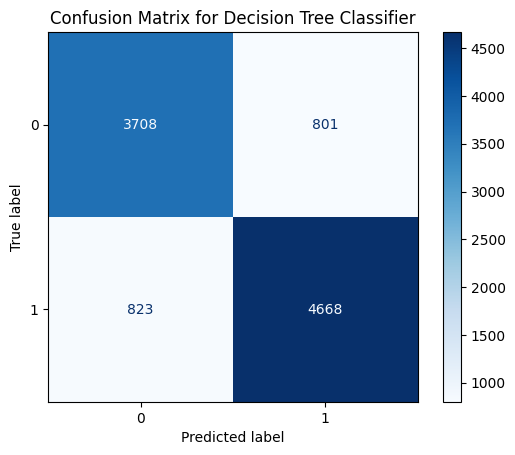

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report for Decision Tree Classifier:")
print(report)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4509
           1       0.85      0.85      0.85      5491

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Model 1- Decision Tree Model

The Decision Tree Classifier has been successfully built and evaluated.

AI Prompts:
Build a decision tree classifier, train on train data and evaluate accuracy.

create a confusion metrix on this DTC

extract the precision, recall and F1 score

Metrics:
Accuracy- 0.8376

 This means that the classifier correctly predicted the loan_status for approximately 83.76% of the samples in your test data.

Confusion Metrix -  

The classifier identified 801 false positives, high number of risky approvals - predicting a loan is safe when it actually defaults (precision) and 823 false negatives, high number of rejections that could have been profitable (recall). CM could have similar recall and precision for

Precision, Recall and F1:

For positive class: both precision and recall are 0.85 and a high F1 score of 0.85 reflects the similarity further (previously said in interpretation of confusion matrix)

The metrics also show the DTC is better at predicting positives (0.85) than negatives (0.82)


Next steps:

Fine-tune the hyperparameters to try improve F1, precision and recall to improve the accuracy.


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good choice for small datasets and binary classification

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8414


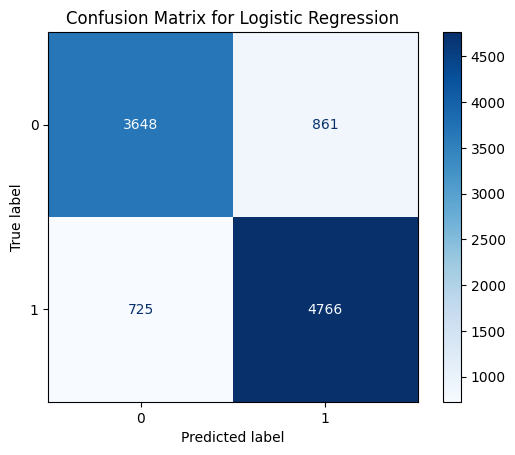

In [ ]:
# Calculate the confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display the confusion matrix
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# Generate the classification report for Logistic Regression
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print the report
print("Classification Report for Logistic Regression:")
print(report_log_reg)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4509
           1       0.85      0.87      0.86      5491

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Model 2- Logistic Regression

The Logistic Regression has been successfully built and evaluated.

AI Prompts: Build a Logistic Regression, train on train data and evaluate accuracy.

create a confusion metrix on this

extract the precision, recall and F1 score

Metrics: Accuracy- 0.8414

This means that the classifier correctly predicted the loan_status for approximately 84.14% of the samples in your test data.

Confusion Metrix -

The classifier identified 861 false positives, high number of risky approvals - predicting a loan is safe when it actually defaults (precision) and 725 false negatives, fairly high a number of rejections that could have been profitable (recall). CM shows a higher precision than recall.

Precision, Recall and F1:

For negative class:  precision (0.83) > recall(0.81) and a lower F1 score of 0.82 reflects the imbalance further (previously said in interpretation of confusion matrix) - compared to higher F1 of DTC

But for positive class: recall> precision and a slightly higher F1 score (0.86) than the negative class

The metrics also show the logistic regression is better at predicting positives (0.86) than negatives (0.82).The higher F1-score confirms that the model is generally better at classifying the majority (paid-off) class than the minority (default) class.

Next steps:

Fine-tune the hyperparameters to try improve F1, precision and recall to improve the accuracy.

Ways might be to use randomsearchcv or gridsearch. Although gridsearch is gives the best possible hyperparameter, it would take significantly longer. So it depends on time available.



Comparision of the two.

